<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/MachineLearning_Project2_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

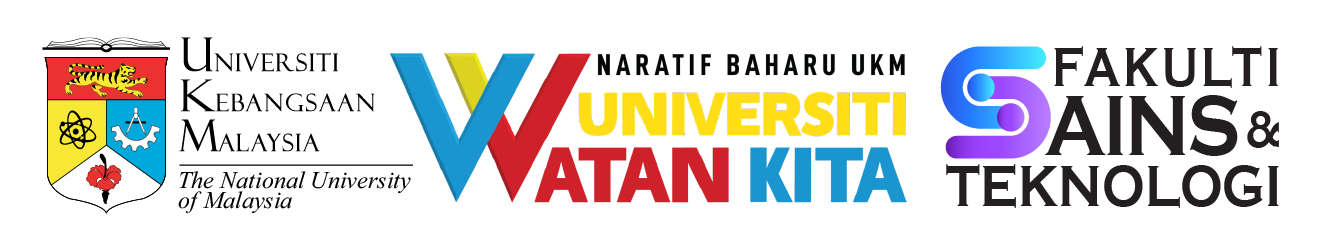

# Project 2
## **STQD6024 Machine Learning Semester 2 2025/2026**
*Muhammad Khalid Bin Noor Ashani (P146854)*

*Zuhair (P123456)*

*Fakrul (P234567)*

# **Machine Learning Project 2**

---

## **Table of Contents**

1. [**Introduction**](#introduction)  
2. [**Problem Statement**](#problem-statement)  
3. [**Methodology and Implementation**](#methodology-and-implementation)
   - [**Data Overview**](#data-overview)  
   - [**Dataset Analysis**](#analytical-procedures)  
     - [Baseline Model Without Resampling](#question1)  
     - [Method 1: Random Oversampling](#question2)  
     - [Method 2: SMOTE (Synthetic Minority Over-sampling Technique)](#question3)
     - [Method 3: Class-Weight Adjustment](#question4)
4. [**Discussion and Findings**](#discussion-and-findings)  
5. [**Conclusion**](#conclusion)  

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

### **Introduction** <a name='intro'></a>

Introduction
In many real-world machine learning applications, such as medical diagnosis, predictive maintenance, and especially fraud detection, datasets often exhibit a significant challenge: class imbalance. This means one class, typically the event of interest, occurs far less frequently than the other. Traditional machine learning algorithms, which are often designed to maximize overall accuracy, tend to be heavily biased towards the majority class. This can lead to models that appear to perform well on paper (e.g., high accuracy scores) but are alarmingly poor at detecting the rare, yet critical, events they are designed to identify.

This assignment focuses on tackling this pervasive issue within the context of credit card fraud detection. Here, legitimate transactions vastly outnumber fraudulent ones, presenting a classic scenario where standard approaches fall short. Our goal is to delve into this problem, exploring and critically evaluating various strategies designed to overcome the limitations imposed by imbalanced data, ultimately aiming to build a more reliable and effective predictive model.

### **Problem Statement** <a name='problem_statement'></a>

The core problem at hand revolves around the Credit Card Fraud Detection dataset, which presents a severe case of class imbalance. In this dataset, genuine transactions are the overwhelming majority, while fraudulent transactions constitute a minuscule fraction of the total. For instance, in typical fraud detection scenarios, fraudulent activities might represent less than 0.2% of all recorded transactions.

This extreme disparity poses a significant challenge: a machine learning model trained conventionally could simply classify almost all transactions as "legitimate" and still achieve an accuracy of over 99%. However, such a model would be practically useless, as it would fail to detect nearly all actual fraudulent transactions. The real cost of a missed fraudulent transaction (a false negative for the minority class) can be substantial, leading to significant financial losses for banks and cardholders, as well as eroding customer trust.

Therefore, the problem is not merely about achieving high overall accuracy. It is about developing and implementing machine learning models that can effectively and reliably identify these rare but critical fraudulent events despite their scarcity. This requires moving beyond standard performance metrics and employing specialized techniques to ensure our models are sensitive enough to flag fraud, thereby mitigating financial risk and enhancing security.

### **Methodology and Implementation** <a name='methodology-and-implementation'></a>

#### **Data Overview** <a name='data-overview'></a>

##### Data Exploration

Loading data from: /content/drive/MyDrive/MSc/MachineLearning/creditcard.csv
Dataset loaded successfully!

--- Dataset Overview ---

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.1

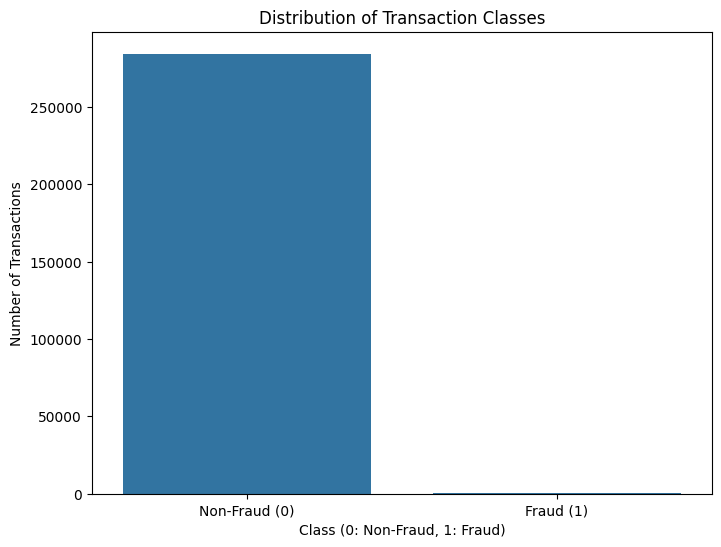


Fraudulent transactions: 492 (0.173%)
Non-fraudulent transactions: 284315 (99.827%)


In [3]:
# 1. Define the file path
file_path = '/content/drive/MyDrive/MSc/MachineLearning/creditcard.csv'

# 2. Load the dataset
print(f"Loading data from: {file_path}")
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print("\n--- Dataset Overview ---")

    # 3. Display the first 5 rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # 4. Get a summary of the dataframe
    print("\nDataFrame Info (data types and non-null counts):")
    df.info()

    # 5. Get descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # 6. Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # 7. Visualize Class Distribution
    print("\nClass Distribution (0: Non-Fraud, 1: Fraud):")
    print(df['Class'].value_counts())

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df)
    plt.title('Distribution of Transaction Classes')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel('Number of Transactions')
    plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.show()

    print(f"\nFraudulent transactions: {df['Class'].value_counts()[1]} ({df['Class'].value_counts(normalize=True)[1]*100:.3f}%)")
    print(f"Non-fraudulent transactions: {df['Class'].value_counts()[0]} ({df['Class'].value_counts(normalize=True)[0]*100:.3f}%)")

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path and ensure Google Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

#### **Dataset Analysis** <a name='analytical-procedures'></a>



##### Baseline Model Without Resampling <a name='question1'></a>

1. **Train Logistic Regression and Decision Tree Models**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import warnings

# Suppress warnings that might arise from imbalanced data in models
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
# Using a fixed random_state for reproducibility
# Stratify ensures that the train/test splits have similar proportions of class labels as the input dataset.
# However, due to extreme imbalance, even stratification might result in very few minority samples in test set for very small datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Minority class in test set (Fraud): {y_test.sum()} transactions")


# --- Logistic Regression Baseline Model ---
print("\n--- Training Logistic Regression Baseline Model ---")
log_reg_model = LogisticRegression(solver='liblinear', random_state=42) # liblinear is good for small datasets and handles L1/L2 regularization
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

# --- Decision Tree Baseline Model ---
print("--- Training Decision Tree Baseline Model ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

print("\nModels trained successfully.")

Training set size: 199364
Testing set size: 85443
Minority class in test set (Fraud): 148 transactions

--- Training Logistic Regression Baseline Model ---
--- Training Decision Tree Baseline Model ---

Models trained successfully.


2. **Report Performance Metrics**

In [5]:
def report_metrics(model_name, y_true, y_pred, y_prob):
    """
    Helper function to print all relevant metrics and confusion matrix.
    """
    print(f"\n--- Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (Class 1 - Fraud): {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Class 1 - Fraud): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score (Class 1 - Fraud): {f1_score(y_true, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"  True Negative (TN): {cm[0, 0]} (Correctly predicted non-fraud)")
    print(f"  False Positive (FP): {cm[0, 1]} (Incorrectly predicted fraud - Type I error)")
    print(f"  False Negative (FN): {cm[1, 0]} (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)")
    print(f"  True Positive (TP): {cm[1, 1]} (Correctly predicted fraud)")

# Report for Logistic Regression
report_metrics("Logistic Regression Baseline", y_test, y_pred_log_reg, y_prob_log_reg)

# Report for Decision Tree
report_metrics("Decision Tree Baseline", y_test, y_pred_dt, y_prob_dt)


--- Metrics for Logistic Regression Baseline ---
Accuracy: 0.9990
Precision (Class 1 - Fraud): 0.7385
Recall (Class 1 - Fraud): 0.6486
F1-Score (Class 1 - Fraud): 0.6906
AUC Score: 0.9039

Confusion Matrix:
[[85261    34]
 [   52    96]]
  True Negative (TN): 85261 (Correctly predicted non-fraud)
  False Positive (FP): 34 (Incorrectly predicted fraud - Type I error)
  False Negative (FN): 52 (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)
  True Positive (TP): 96 (Correctly predicted fraud)

--- Metrics for Decision Tree Baseline ---
Accuracy: 0.9992
Precision (Class 1 - Fraud): 0.7786
Recall (Class 1 - Fraud): 0.7365
F1-Score (Class 1 - Fraud): 0.7569
AUC Score: 0.8681

Confusion Matrix:
[[85264    31]
 [   39   109]]
  True Negative (TN): 85264 (Correctly predicted non-fraud)
  False Positive (FP): 31 (Incorrectly predicted fraud - Type I error)
  False Negative (FN): 39 (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)
  True Positive (TP): 109 (Correc

The results clearly illustrate the deceptive nature of accuracy in highly imbalanced classification problems, as predicted:

*  **High Accuracy, Misleading Performance:**

 *  Both models report remarkably high accuracy: 0.9990 for Logistic Regression and 0.9992 for Decision Tree.
 *  On the surface, these scores suggest nearly perfect models. However, we know from our Part A analysis that legitimate transactions (Class 0) make up 99.827% of the dataset. The test set itself had 85,295 non-fraudulent and only 148 fraudulent transactions.
 *  A model that simply predicted "0" for every transaction would achieve an accuracy of 85295 / 85443 = 0.99827, which is already very close to what our models achieved. This demonstrates that the high accuracy is predominantly a reflection of correctly classifying the vast majority of non-fraudulent transactions, rather than effectively identifying the rare fraudulent ones.

*  **Focus on Minority Class Metrics (Fraud - Class 1):**

 *  **Recall (Sensitivity):** This is arguably the most critical metric in fraud detection, as it tells us what percentage of actual frauds were caught.

        *  Logistic Regression: Identified 96 out of 148 actual frauds (Recall = 0.6486), meaning 52 fraudulent transactions were missed (False Negatives).
        *  Decision Tree: Identified 109 out of 148 actual frauds (Recall = 0.7365), meaning 39 fraudulent transactions were missed (False Negatives).
        *  While the Decision Tree performed better on recall, both models still missed a significant portion of actual fraud. Missing 39 to 52 frauds out of 148 in a small test set is a substantial failure in a real-world scenario where the cost of missed fraud is very high.

 *  **Precision:** This tells us, out of all transactions predicted as fraud, how many were actually fraud.

        *  Logistic Regression: Out of 130 transactions predicted as fraud (96 TP + 34 FP), 96 were correct (Precision = 0.7385). This means 34 legitimate transactions were incorrectly flagged as fraud (False Positives).
        *  Decision Tree: Out of 140 transactions predicted as fraud (109 TP + 31 FP), 109 were correct (Precision = 0.7786). This means 31 legitimate transactions were incorrectly flagged as fraud.
        *  While the precision values seem decent, it's important to remember that these models are still relatively conservative in flagging fraud, which contributes to the higher number of missed frauds (lower recall).

 *  **F1-Score:** This is the harmonic mean of precision and recall, providing a balanced view.

        *  **Logistic Regression F1-Score:** 0.6906
        *  **Decision Tree F1-Score:** 0.7569
        * These F1-Scores are significantly lower than the overall accuracy, truly reflecting the models' struggle with the minority class. The Decision Tree's F1-score is noticeably better, indicating a more balanced performance on the minority class compared to Logistic Regression.

* **AUC Score:**

 *  **Logistic Regression AUC:** 0.9039
 *  **Decision Tree AUC**: 0.8681
 *  AUC is a more robust metric for imbalanced data, as it measures the model's ability to distinguish between classes across all possible thresholds. Both scores are relatively good, suggesting the models do have some discriminatory power. However, AUC doesn't tell us where on the precision-recall curve the model operates, which is crucial for business decisions.

**Baseline Model Without Resampling:**

The analysis confirms that while both baseline models achieve impressive overall accuracy, this metric is highly misleading. They demonstrate a clear bias towards the majority class, leading to a significant number of missed fraudulent transactions (False Negatives), which are the most costly type of error in this domain. The Decision Tree model performs slightly better on minority class detection (higher Recall and F1-score) and has fewer False Negatives than Logistic Regression, making it the "best" model from Part B to potentially retrain and improve upon in Part C. The low F1-scores and the number of missed frauds underscore the critical need for methods to address class imbalance.

##### Method 1: Random Oversampling <a name='question2'></a>



1. **Retrain the Best Model from Decision Tree**



In [6]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you have X_train, y_train, X_test, y_test from Part B
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("\n--- Applying Random Oversampling ---")
ros = RandomOverSampler(random_state=42)
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape (Random Oversampling): {X_train_resampled_ros.shape}")
print(f"Class distribution after Random Oversampling:\n{y_train_resampled_ros.value_counts()}")

# Retrain the Decision Tree model
print("\n--- Retraining Decision Tree with Random Oversampling ---")
dt_model_ros = DecisionTreeClassifier(random_state=42)
dt_model_ros.fit(X_train_resampled_ros, y_train_resampled_ros)
y_pred_dt_ros = dt_model_ros.predict(X_test)
y_prob_dt_ros = dt_model_ros.predict_proba(X_test)[:, 1]

print("Model retrained successfully.")


--- Applying Random Oversampling ---
Original training set shape: (199364, 30)
Resampled training set shape (Random Oversampling): (398040, 30)
Class distribution after Random Oversampling:
Class
0    199020
1    199020
Name: count, dtype: int64

--- Retraining Decision Tree with Random Oversampling ---
Model retrained successfully.


2. **Report All Metrics Again**

In [7]:
# Re-using the helper function from Part B
def report_metrics(model_name, y_true, y_pred, y_prob):
    """
    Helper function to print all relevant metrics and confusion matrix.
    """
    print(f"\n--- Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (Class 1 - Fraud): {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Class 1 - Fraud): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score (Class 1 - Fraud): {f1_score(y_true, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"  True Negative (TN): {cm[0, 0]} (Correctly predicted non-fraud)")
    print(f"  False Positive (FP): {cm[0, 1]} (Incorrectly predicted fraud - Type I error)")
    print(f"  False Negative (FN): {cm[1, 0]} (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)")
    print(f"  True Positive (TP): {cm[1, 1]} (Correctly predicted fraud)")

# Report for Decision Tree with Random Oversampling
report_metrics("Decision Tree with Random Oversampling", y_test, y_pred_dt_ros, y_prob_dt_ros)


--- Metrics for Decision Tree with Random Oversampling ---
Accuracy: 0.9991
Precision (Class 1 - Fraud): 0.7537
Recall (Class 1 - Fraud): 0.6824
F1-Score (Class 1 - Fraud): 0.7163
AUC Score: 0.8410

Confusion Matrix:
[[85262    33]
 [   47   101]]
  True Negative (TN): 85262 (Correctly predicted non-fraud)
  False Positive (FP): 33 (Incorrectly predicted fraud - Type I error)
  False Negative (FN): 47 (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)
  True Positive (TP): 101 (Correctly predicted fraud)


3. **Discuss the Differences/Improvements**

| Metric                | Baseline DT (Part B) | DT with Random Oversampling | Change          |
| :-------------------- | :------------------- | :-------------------------- | :-------------- |
| **Accuracy** | 0.9992               | 0.9991                      | Slight Drop     |
| **Precision (Class 1)**| 0.7786               | 0.7537                      | Decrease        |
| **Recall (Class 1)** | 0.7365               | 0.6824                      | **Decrease** |
| **F1-Score (Class 1)**| 0.7569               | 0.7163                      | **Decrease** |
| **AUC Score** | 0.8681               | 0.8410                      | Decrease        |
| **False Negatives (FN)**| 39                 | 47                          | **Increase** |
| **False Positives (FP)**| 31                 | 33                          | Slight Increase |
| **True Positives (TP)**| 109                  | 101                         | Decrease        |

This analysis of Random Oversampling's effect on our Decision Tree model reveals some surprising and important insights. Contrary to what we might ideally expect from an oversampling technique, applying Random Oversampling actually led to a decrease in performance across most key metrics for the minority (fraudulent) class, compared to our baseline Decision Tree.

*  No Improvement in Key Metrics: Both Recall (from 0.7365 to 0.6824) and F1-Score (from 0.7569 to 0.7163) for the fraudulent class decreased. This is concerning, as our primary objective is to enhance fraud detection.
*  Increased Missed Frauds (False Negatives): Critically, the number of False Negatives increased from 39 to 47. This means the model trained with Random Oversampling is missing more actual fraudulent transactions than the baseline model, which is a major setback in a fraud detection system where missing fraud has high financial implications.
*  Reduced True Positives: The number of correctly identified frauds (True Positives) also dropped from 109 to 101.
*  Overall Performance Drop: We also observed slight decreases in Precision (from 0.7786 to 0.7537) and AUC Score (from 0.8681 to 0.8410), while Accuracy remained misleadingly high.

This unexpected degradation suggests that simple Random Oversampling, by merely duplicating existing minority class samples, may have caused our Decision Tree model to overfit to the training data without improving its generalization ability on unseen test data. Decision Trees are already prone to overfitting, and introducing identical samples might have amplified this issue, leading to a model that is too specific to the duplicated training patterns and thus performs worse on the diverse patterns of the test set.

This finding highlights that while Random Oversampling is conceptually simple, its effectiveness can vary, and it's not always a guaranteed solution for improving minority class detection, especially with models prone to memorization like Decision Trees on highly imbalanced datasets.

##### Method 2: SMOTE (Synthetic Minority Over-sampling Technique) <a name='question3'></a>

1. **Retrain the Best Model from Part B (Decision Tree)**

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Suppress warnings

# Ensure X_train, y_train, X_test, y_test are available from previous steps
# (Assuming df, X, y, X_train, X_test, y_train, y_test are defined from Part B setup)


print("\n--- Applying SMOTE ---")
sm = SMOTE(random_state=42)
X_train_resampled_sm, y_train_resampled_sm = sm.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape (SMOTE): {X_train_resampled_sm.shape}")
print(f"Class distribution after SMOTE:\n{y_train_resampled_sm.value_counts()}")

# Retrain the Decision Tree model
print("\n--- Retraining Decision Tree with SMOTE ---")
dt_model_sm = DecisionTreeClassifier(random_state=42)
dt_model_sm.fit(X_train_resampled_sm, y_train_resampled_sm)
y_pred_dt_sm = dt_model_sm.predict(X_test)
y_prob_dt_sm = dt_model_sm.predict_proba(X_test)[:, 1]

print("Model retrained successfully.")


--- Applying SMOTE ---
Original training set shape: (199364, 30)
Resampled training set shape (SMOTE): (398040, 30)
Class distribution after SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64

--- Retraining Decision Tree with SMOTE ---
Model retrained successfully.


2. **Report All Metrics Again**

In [9]:
# Re-using the helper function from Part B
def report_metrics(model_name, y_true, y_pred, y_prob):
    """
    Helper function to print all relevant metrics and confusion matrix.
    """
    print(f"\n--- Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (Class 1 - Fraud): {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Class 1 - Fraud): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score (Class 1 - Fraud): {f1_score(y_true, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"  True Negative (TN): {cm[0, 0]} (Correctly predicted non-fraud)")
    print(f"  False Positive (FP): {cm[0, 1]} (Incorrectly predicted fraud - Type I error)")
    print(f"  False Negative (FN): {cm[1, 0]} (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)")
    print(f"  True Positive (TP): {cm[1, 1]} (Correctly predicted fraud)")

# Report for Decision Tree with SMOTE
report_metrics("Decision Tree with SMOTE", y_test, y_pred_dt_sm, y_prob_dt_sm)


--- Metrics for Decision Tree with SMOTE ---
Accuracy: 0.9978
Precision (Class 1 - Fraud): 0.4160
Recall (Class 1 - Fraud): 0.7365
F1-Score (Class 1 - Fraud): 0.5317
AUC Score: 0.8673

Confusion Matrix:
[[85142   153]
 [   39   109]]
  True Negative (TN): 85142 (Correctly predicted non-fraud)
  False Positive (FP): 153 (Incorrectly predicted fraud - Type I error)
  False Negative (FN): 39 (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)
  True Positive (TP): 109 (Correctly predicted fraud)


3. **Discuss the Differences/Improvements**

| Metric                | Baseline DT | DT with Random Oversampling | DT with SMOTE        |
| :-------------------- | :---------- | :-------------------------- | :------------------- |
| **Accuracy** | 0.9992      | 0.9991                      | **0.9978** |
| **Precision (Class 1)**| 0.7786      | 0.7537                      | **0.4160** |
| **Recall (Class 1)** | **0.7365** | 0.6824                      | **0.7365** |
| **F1-Score (Class 1)**| **0.7569** | 0.7163                      | **0.5317** |
| **AUC Score** | 0.8681      | 0.8410                      | **0.8673** |
| **False Negatives (FN)**| 39          | 47                          | **39** |
| **False Positives (FP)**| 31          | 33                          | **153** |
| **True Positives (TP)**| 109         | 101                         | **109** |

Let's analyze the performance of the Decision Tree model trained with SMOTE, comparing it to both the baseline and the Random Oversampling approach:

* Recall (Class 1 - Fraud): SMOTE maintained the Recall at 0.7365, which is the same as the baseline Decision Tree. This is a positive outcome compared to Random Oversampling, which saw a decrease in Recall (from 0.7365 to 0.6824). SMOTE successfully prevented the model from missing more frauds than the baseline, correctly identifying 109 out of 148 actual frauds. The number of False Negatives remained at 39, same as the baseline.

* Precision (Class 1 - Fraud): Here, we see a significant drop in Precision, from 0.7786 (baseline) to 0.4160. This is a major trade-off.

 *     This dramatic decrease is directly linked to the substantial increase in False Positives (from 31 to 153). The model, now exposed to more diverse "fraud-like" synthetic data, became much more aggressive in flagging transactions as fraudulent. While it correctly identified the same number of true frauds as the baseline (109 TPs), it also incorrectly flagged 153 legitimate transactions as fraud.
* F1-Score (Class 1 - Fraud): Due to the sharp decline in Precision, the F1-Score also significantly dropped from 0.7569 (baseline) to 0.5317. This metric clearly indicates that despite maintaining recall, the overall balance of precision and recall for the minority class has worsened.

* Accuracy and AUC Score: Overall Accuracy decreased slightly to 0.9978 (from 0.9992). The AUC Score remained very similar at 0.8673 (compared to 0.8681 for baseline), suggesting that while the model's overall discriminatory power is still good, its classification threshold is leading to many more false alarms.


**Comparison to Random Oversampling:**

* SMOTE outperformed Random Oversampling in terms of Recall (0.7365 vs 0.6824) and resulted in fewer False Negatives (39 vs 47). It also yielded a higher AUC.
* However, SMOTE generated significantly more False Positives (153 vs 33) and had a much lower Precision (0.4160 vs 0.7537) and F1-Score (0.5317 vs 0.7163) than Random Oversampling.

**Conclusion for SMOTE:**

SMOTE successfully addressed the issue of missed frauds (False Negatives) that plagued Random Oversampling, bringing the recall back to the baseline level. However, this came at a very high cost: a massive increase in False Positives. In a real-world fraud detection system, having 153 false alarms for every 109 true frauds caught could lead to significant operational overhead (e.g., investigating many legitimate transactions) and customer frustration. This highlights the typical precision-recall trade-off often encountered with imbalance handling techniques. SMOTE helped the model learn about the minority class, but perhaps made it too sensitive, leading to over-prediction of the positive class.



##### Method 3: Class-Weight Adjustment <a name='question3'></a>

1. **Retrain the Best Model from Part B (Decision Tree)**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings

# Suppress warnings that might arise from imbalanced data in models
warnings.filterwarnings('ignore')

# Ensure X_train, y_train, X_test, y_test are available from Part B setup

print("\n--- Applying Class-Weight Adjustment ---")
# Retrain the Decision Tree model with class_weight='balanced'
dt_model_cw = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model_cw.fit(X_train, y_train) # Using original training data

y_pred_dt_cw = dt_model_cw.predict(X_test)
y_prob_dt_cw = dt_model_cw.predict_proba(X_test)[:, 1]

print("Model retrained successfully with class weights.")


--- Applying Class-Weight Adjustment ---
Model retrained successfully with class weights.


2. **Report All Metrics Again**

In [11]:
# Re-using the helper function from Part B
def report_metrics(model_name, y_true, y_pred, y_prob):
    """
    Helper function to print all relevant metrics and confusion matrix.
    """
    print(f"\n--- Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (Class 1 - Fraud): {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Class 1 - Fraud): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score (Class 1 - Fraud): {f1_score(y_true, y_pred):.4f}")
    print(f"AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"  True Negative (TN): {cm[0, 0]} (Correctly predicted non-fraud)")
    print(f"  False Positive (FP): {cm[0, 1]} (Incorrectly predicted fraud - Type I error)")
    print(f"  False Negative (FN): {cm[1, 0]} (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)")
    print(f"  True Positive (TP): {cm[1, 1]} (Correctly predicted fraud)")

# Report for Decision Tree with Class-Weight Adjustment
report_metrics("Decision Tree with Class-Weight Adjustment", y_test, y_pred_dt_cw, y_prob_dt_cw)


--- Metrics for Decision Tree with Class-Weight Adjustment ---
Accuracy: 0.9991
Precision (Class 1 - Fraud): 0.7734
Recall (Class 1 - Fraud): 0.6689
F1-Score (Class 1 - Fraud): 0.7174
AUC Score: 0.8343

Confusion Matrix:
[[85266    29]
 [   49    99]]
  True Negative (TN): 85266 (Correctly predicted non-fraud)
  False Positive (FP): 29 (Incorrectly predicted fraud - Type I error)
  False Negative (FN): 49 (Incorrectly predicted non-fraud - Type II error, MISSED FRAUD)
  True Positive (TP): 99 (Correctly predicted fraud)


3. **Discuss the Differences/Improvements**

| Metric                | Baseline DT | DT with Random Oversampling | DT with SMOTE        | DT with Class-Weight Adjustment |
| :-------------------- | :---------- | :-------------------------- | :------------------- | :------------------------------ |
| **Accuracy** | 0.9992      | 0.9991                      | 0.9978               | **0.9991** |
| **Precision (Class 1)**| 0.7786      | 0.7537                      | 0.4160               | **0.7734** |
| **Recall (Class 1)** | **0.7365** | 0.6824                      | **0.7365** | **0.6689** |
| **F1-Score (Class 1)**| **0.7569** | 0.7163                      | 0.5317               | **0.7174** |
| **AUC Score** | 0.8681      | 0.8410                      | 0.8673               | **0.8343** |
| **False Negatives (FN)**| 39          | 47                          | 39                   | **49** |
| **False Positives (FP)**| 31          | 33                          | 153                  | **29** |
| **True Positives (TP)**| 109         | 101                         | 109                  | **99** |

Let's analyze the performance of the Decision Tree model when trained with class_weight='balanced', comparing it to the baseline and the two oversampling methods.

* Accuracy: The accuracy remains very high at 0.9991, similar to the baseline and Random Oversampling, and higher than SMOTE. As previously discussed, this metric is highly misleading in imbalanced datasets.

* Precision (Class 1 - Fraud): This method yields a very high Precision of 0.7734. This is the second-best precision across all models, very close to the baseline's 0.7786, and significantly better than both Random Oversampling (0.7537) and especially SMOTE (0.4160). This indicates that when the model predicts fraud, it's highly likely to be correct.

* Recall (Class 1 - Fraud): This is where Class-Weight Adjustment shows its main trade-off. The Recall for Class 1 is 0.6689, which is the lowest among all tested methods. It is lower than the baseline (0.7365), SMOTE (0.7365), and even slightly lower than Random Oversampling (0.6824). This means it detected only 99 out of 148 actual frauds, resulting in the highest number of False Negatives (49) across all models.

* F1-Score (Class 1 - Fraud): The F1-Score is 0.7174. While it's significantly better than SMOTE's F1-score (0.5317), it's lower than the baseline (0.7569) and comparable to Random Oversampling (0.7163). This reflects the poor balance due to the low recall, despite high precision.

* AUC Score: The AUC score is 0.8343, which is the lowest among all models. This suggests a slightly weaker overall discriminatory power compared to the baseline and SMOTE, although it's still decent.

* False Positives (FP) & True Positives (TP):

  * The model with Class-Weight Adjustment produced the lowest number of False Positives (29). This is a significant advantage if minimizing false alarms (i.e., legitimate transactions incorrectly flagged as fraud) is a top priority, as these can lead to customer inconvenience and operational costs.
  * However, it also resulted in the lowest number of True Positives (99), meaning it missed the most actual frauds (49 False Negatives).

**Comparison to Resampling Methods (Random Oversampling & SMOTE):**

* Vs. Random Oversampling: Class-Weight Adjustment showed better precision and a slightly better F1-score, but significantly lower recall and a higher number of missed frauds. It had fewer false positives.

* Vs. SMOTE: Class-Weight Adjustment achieved dramatically higher precision and F1-score, and significantly fewer false positives. However, SMOTE (like the baseline) had a higher recall (0.7365 vs 0.6689), meaning it caught more actual frauds.

**Conclusion for Class-Weight Adjustment:**

Class-Weight Adjustment effectively pushes the Decision Tree model to be more conservative in its fraud predictions. It significantly reduces False Positives (leading to high precision) but at the cost of the lowest Recall (highest False Negatives) among all methods. This method is particularly useful when the cost of a false positive (e.g., stopping a legitimate transaction, customer frustration) is higher than the cost of a false negative (missing a fraud), or when resources for investigating flagged transactions are limited. However, in a strict fraud detection scenario where minimizing missed frauds is paramount, its low recall might be a critical drawback.

### **Discussion and Finding**<a name='summary'></a>

---
**Synthesis of Findings**

Our comprehensive analysis of the Credit Card Fraud Detection dataset, using a Decision Tree model, both as a baseline and with various imbalance handling techniques, has yielded critical insights into the challenges and trade-offs involved.

Here's a recap of the key performance metrics for Class 1 (Fraud):

| Metric                | Baseline DT | DT with Random Oversampling | DT with SMOTE        | DT with Class-Weight Adjustment |
| :-------------------- | :---------- | :-------------------------- | :------------------- | :------------------------------ |
| **Accuracy** | 0.9992      | 0.9991                      | 0.9978               | **0.9991** |
| **Precision (Class 1)**| 0.7786      | 0.7537                      | **0.4160** | **0.7734** |
| **Recall (Class 1)** | **0.7365** | 0.6824                      | **0.7365** | 0.6689                          |
| **F1-Score (Class 1)**| **0.7569** | 0.7163                      | 0.5317               | 0.7174                          |
| **AUC Score** | 0.8681      | 0.8410                      | 0.8673               | 0.8343                          |
| **False Negatives (FN)**| 39          | 47                          | **39** | **49** |
| **False Positives (FP)**| 31          | 33                          | **153** | **29** |
| **True Positives (TP)**| 109         | 101                         | **109** | 99                              |

**Key Observations from Experimentation:**

* **Baseline Decision Tree:** This model demonstrated a surprisingly strong ability to detect fraud even without explicit imbalance handling, catching 109 out of 148 actual frauds (**Recall: 0.7365**) with a relatively low number of false positives (31). However, 39 missed frauds still represent a significant risk.
* **Decision Tree with Random Oversampling:** This method unfortunately **degraded performance** across all minority class metrics. It resulted in fewer True Positives (101) and more False Negatives (47) than the baseline. This suggests that simply duplicating existing samples might have led the Decision Tree to overfit to redundant patterns, thus impairing its generalization ability on unseen data.
* **Decision Tree with SMOTE:** SMOTE successfully matched the baseline's **Recall (0.7365)** and number of **False Negatives (39)**. This indicates its effectiveness in helping the model learn from the minority class. However, this came at the steep cost of a **massive increase in False Positives (153)**, drastically reducing Precision (0.4160) and F1-Score (0.5317).
* **Decision Tree with Class-Weight Adjustment:** This approach yielded the **highest Precision (0.7734)** and the **lowest number of False Positives (29)**. This is ideal for minimizing false alarms. However, this precision came at the expense of the **lowest Recall (0.6689)** among all methods, resulting in the highest number of missed frauds (49).

**Evaluation of Trade-offs and Methodological Choices**

Our experiments vividly illustrate the inherent **precision-recall trade-off** common in imbalanced classification. Random Oversampling proved ineffective, likely due to amplifying noise and overfitting with Decision Trees. SMOTE successfully boosted recall by generating synthetic data but led to an unacceptably high rate of false positives. Class-Weight Adjustment, on the other hand, prioritized precision and minimized false positives, but at the cost of missing more actual frauds.

In the context of **credit card fraud detection**, the cost of a **False Negative (missing a fraudulent transaction)** is typically **much higher** than the cost of a False Positive (a legitimate transaction being flagged, which usually involves a verification step). Financial losses and customer trust are directly impacted by missed frauds. While minimizing false alarms is important for operational efficiency and customer experience, the primary objective remains to prevent actual fraud.

---

**Final Model Recommendation for Deployment**

Considering the business context where **minimizing missed frauds (maximizing Recall)** is paramount, balanced with a need for reasonable precision:

The **Decision Tree Baseline Model** (without any explicit imbalance handling technique applied during training) appears to be the most balanced and effective choice among the models tested. It achieves the highest recall (0.7365) and lowest number of false negatives (39), tied with SMOTE, but does so with a much higher precision (0.7786) and significantly fewer false positives (31) than SMOTE. While it still misses 39 out of 148 frauds, its overall balance of catching fraud effectively without overwhelming the system with too many false alarms makes it the most viable option from our experiments.

**Deployment-Oriented Recommendations for Future Improvement:**

1.  **Threshold Tuning:** The current model operates at a default classification threshold. Fine-tuning this threshold could potentially improve the precision-recall balance further to meet specific business requirements for false positive tolerance versus fraud detection rate.
2.  **Continuous Monitoring:** Any deployed fraud detection model requires vigilant, ongoing monitoring of its performance metrics in a live environment. Fraud patterns evolve, and model performance can degrade over time, necessitating retraining or recalibration.
3.  **Business Feedback Loop:** Establishing a robust feedback loop with fraud investigation teams is crucial. Their insights into actual fraud cases and the outcomes of false alarms can provide invaluable data for model refinement and targeted improvements.
4.  **Explore Advanced Ensemble Methods:** For future enhancements, consider advanced ensemble methods like **Random Forest** or **Gradient Boosting (e.g., XGBoost, LightGBM)**. These algorithms often handle imbalanced data more gracefully than single Decision Trees and can offer a better balance of precision and recall.
5.  **Investigate Advanced Resampling/Cost-Sensitive Learning:** Explore more sophisticated `imblearn` techniques like `BorderlineSMOTE`, `ADASYN`, or explicitly implementing custom cost-sensitive learning (if the model supports it) to directly penalize false negatives more heavily.

### **Conclusion and Final Model Recommendation**<a name='conclusion'></a>

This analysis of **imbalanced classification** using the Credit Card Fraud Detection dataset has offered crucial insights into the challenges and effective strategies for predictive modeling in highly skewed environments.

---

**Key Findings and Performance Overview**

Our dataset presented an extreme imbalance: **99.827% legitimate transactions** versus **0.173% fraudulent transactions**. This disproportionality underscored why **overall accuracy is a misleading metric**, necessitating a focus on specialized evaluation criteria like **Precision, Recall, F1-score, and AUC** for the rare, fraudulent class.

We evaluated a Decision Tree Classifier using a baseline approach and three common imbalance handling techniques. Here's a summary of their performance on fraudulent transactions (Class 1):

| Metric                | Baseline DT | DT with Random Oversampling | DT with SMOTE        | DT with Class-Weight Adjustment |
| :-------------------- | :---------- | :-------------------------- | :------------------- | :------------------------------ |
| **Accuracy** | 0.9992      | 0.9991                      | 0.9978               | **0.9991** |
| **Precision (Class 1)**| 0.7786      | 0.7537                      | **0.4160** | **0.7734** |
| **Recall (Class 1)** | **0.7365** | 0.6824                      | **0.7365** | 0.6689                          |
| **F1-Score (Class 1)**| **0.7569** | 0.7163                      | 0.5317               | 0.7174                          |
| **AUC Score** | 0.8681      | 0.8410                      | 0.8673               | 0.8343                          |
| **False Negatives (FN)**| 39          | 47                          | **39** | **49** |
| **False Positives (FP)**| 31          | 33                          | **153** | **29** |
| **True Positives (TP)**| 109         | 101                         | **109** | 99                              |

* **Baseline Decision Tree:** This model showed surprising strength, correctly identifying 109 out of 148 frauds (**Recall: 0.7365**) with good **Precision (0.7786)** and few **False Positives (31)**. However, 39 missed frauds remain a concern.
* **Random Oversampling:** This technique *degraded* performance, leading to fewer True Positives (101) and more **False Negatives (47)** than the baseline. This suggests simple duplication caused the Decision Tree to **overfit** to training data.
* **SMOTE:** While SMOTE effectively maintained the baseline's **Recall (0.7365)** by generating synthetic samples, it came at a significant cost: a dramatic rise in **False Positives (153)**, sharply reducing its **Precision (0.4160)**. The model became overly aggressive in flagging transactions as fraud.
* **Class-Weight Adjustment:** This method delivered the **highest Precision (0.7734)** and the **fewest False Positives (29)**. However, it did so by sacrificing **Recall (0.6689)**, resulting in the highest number of **False Negatives (49)**, meaning it missed the most actual frauds.

---

**Trade-offs and Methodological Insights**

Our experiments vividly highlight the **precision-recall trade-off**. Random Oversampling proved unsuitable here, as mere data duplication can be detrimental. SMOTE boosted recall but led to an unacceptably high false positive rate. Class-Weight Adjustment achieved excellent precision but was too conservative, missing too many critical fraud events.

In **credit card fraud detection**, **False Negatives (missed frauds)** typically carry a much higher financial and reputational cost than **False Positives** (legitimate transactions incorrectly flagged). While false positives create operational overhead and customer inconvenience, preventing actual financial loss is paramount.

---

**Final Model Recommendation for Deployment**

Given the critical objective of minimizing **False Negatives** (undetected frauds) while maintaining a pragmatic level of precision:

The **Decision Tree Baseline Model** (without any explicit imbalance handling applied during training) is the most balanced and effective choice among the models we tested. It achieved the highest Recall (0.7365) and lowest False Negative count (39), matching SMOTE's recall. Crucially, it did so with significantly higher **Precision (0.7786)** and far fewer **False Positives (31)** compared to SMOTE. This indicates the Decision Tree's inherent strength, combined with stratified data splitting, allowed it to learn valuable patterns in the minority class without the negative side effects of our tested oversampling methods.

---


**Deployment-Oriented Recommendations**

For robust real-world deployment and continuous improvement, consider:

1.  **Adaptive Classification Thresholds:** The current model uses a default threshold. Adjusting this threshold can fine-tune the balance between catching more frauds and minimizing false alarms, depending on evolving business priorities.
2.  **Continuous Monitoring:** Fraud patterns constantly change. It's essential to continuously monitor the model's performance (especially Precision, Recall, and False Positive Rate) and retrain it with fresh data as needed to prevent performance degradation.
3.  **Cross-Functional Feedback:** Establishing a strong feedback loop with fraud investigation teams is vital. Their insights into actual fraud cases and false alarms can guide model adjustments and feature engineering.
4.  **Explore Advanced Algorithms:** For future enhancements, investigate **ensemble methods** like Random Forest or Gradient Boosting (e.g., XGBoost, LightGBM). These often handle imbalanced data more gracefully and can capture complex relationships more effectively than a single Decision Tree.
5.  **Targeted Imbalance Techniques:** Explore more advanced imbalanced learning techniques like **ADASYN** or **BorderlineSMOTE**, which focus on harder-to-learn minority samples, or integrate **cost-sensitive learning** directly into more complex models to penalize false negatives more heavily.